# Escalado y Normalización
Transformar las variables numéricas para que tengan propiedades útiles.

En este cuaderno, se vera cómo escalar y normalizar los datos (¡y cuál es la diferencia entre los dos!).

## Configura el entorno
Lo primero que se tiene que hacer es cargar las bibliotecas que usaran.

In [1]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
discapacidadDeptos = pd.read_excel("1_data_ENCV_1_manual.xlsx")

# set seed for reproducibility
np.random.seed(0)

discapacidadDeptos

,Departamentos,Área,Total_Nacional,Unnamed: 3,Total PcD,PcD %,Total Hombres,% Hombres,Totales Mujeres,% Mujeres
0,Total nacional,Total,46857.311700,NaN,2647.097320,5.649273,1202.226670,45.416791,1444.870650,54.583209
1,Total nacional,Cabecera,35868.917100,NaN,2075.418980,5.786121,898.202377,43.278123,1177.216600,56.721877
2,Total nacional,Centros poblados y rural disperso,10988.394500,NaN,571.678337,5.202565,304.024290,53.181006,267.654047,46.818994
3,Amazonas,Total,70.200000,NaN,1.280620,1.825065,0.603946,1.656829,0.676674,2.006950
4,Amazonas,Cabecera,35.700000,NaN,0.761873,2.136251,0.287703,1.586638,0.474170,2.704728
...,...,...,...,...,...,...,...,...,...,...
96,Vaupés,Cabecera,12.024834,NaN,0.313139,2.604103,0.176888,2.809226,0.136251,2.378621
97,Vaupés,Centros poblados y rural disperso,27.214702,NaN,0.353540,1.299076,0.232530,1.623503,0.121010,0.938645
98,Vichada,Total,98.716633,NaN,1.535604,1.555567,0.793193,1.518105,0.742411,1.597691
99,Vichada,Cabecera,25.047192,NaN,0.595877,2.379016,0.287005,2.241771,0.308872,2.522516


## Escalado vs. Normalización: ¿Cuál es la diferencia?
Una de las razones por las que es fácil confundirse entre escalado y normalización es que los términos a veces se usan indistintamente y, para hacerlo aún más confuso, ¡son muy similares! En ambos casos está transformando los valores de las variables numéricas para que los puntos de datos transformados tengan propiedades útiles específicas. La diferencia es que:

- Escalar, está cambiando el rango de sus datos, mientras que en la 
- Normalización, está cambiando la forma de la distribución de sus datos. Se hablara un poco más en profundidad sobre cada una de estas opciones.

## Scaling
Esto significa que está transformando sus datos para que se ajusten a una escala específica, como 0-100 o 0-1. Desea escalar los datos cuando utiliza métodos basados en medidas de la distancia entre los puntos de datos, como las máquinas de vectores de soporte (SVM) o los k-vecinos más cercanos (KNN).  Con estos algoritmos, se le da la misma importancia a un cambio de "1" en cualquier característica numérica. Al escalar sus variables, puede ayudar a comparar diferentes variables en igualdad de condiciones.

## Normalization

Escalar solo cambia el rango de sus datos. La normalización es una transformación más radical. El objetivo de la normalización es cambiar sus observaciones para que puedan describirse como una distribución normal.

* _Distribución normal_: también conocida como "curva de campana", se trata de una distribución estadística específica en la que aproximadamente las mismas observaciones caen por encima y por debajo de la media, la media y la mediana son iguales, y hay más observaciones más cercanas a la media. La distribución normal también se conoce como distribución gaussiana.

En general, se normalizará los datos si va a utilizar una técnica estadística o de aprendizaje automático que suponga que sus datos se distribuyen normalmente. Algunos ejemplos de estos incluyen análisis discriminante lineal (LDA) y Gaussian naive Bayes Consejo profesional: cualquier método con "Gaussian" en el nombre probablemente asuma la normalidad).

El método que se usara para normalizar aquí se llama Transformación de Box-Cox. Echemos un vistazo rápido a cómo se ve la normalización de algunos datos:

In [3]:
print(discapacidadDeptos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Departamentos    101 non-null    object 
 1   Área             101 non-null    object 
 2   Total_Nacional   101 non-null    float64
 3   Unnamed: 3       0 non-null      float64
 4   Total PcD        101 non-null    float64
 5   PcD %            101 non-null    float64
 6   Total Hombres    101 non-null    float64
 7   % Hombres        101 non-null    float64
 8   Totales Mujeres  101 non-null    float64
 9   % Mujeres        101 non-null    float64
dtypes: float64(8), object(2)
memory usage: 8.0+ KB
None


In [6]:
# select the Total_Nacional column
total_nal = pd.DataFrame(discapacidadDeptos.Total_Nacional)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(total_nal, columns=['Total_Nacional'])


print('Original data\nPreview:\n', total_nal.head())
print('Minimum value:', float(total_nal.min()),
      '\nMaximum value:', float(total_nal.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))




Original data
Preview:
    Total_Nacional
0      46857.3117
1      35868.9171
2      10988.3945
3         70.2000
4         35.7000
Minimum value: 12.0248344 
Maximum value: 46857.3117
______________________________

Scaled data
Preview:
    Total_Nacional
0        1.000000
1        0.765432
2        0.234311
3        0.001242
4        0.000505
Minimum value: 0.0 
Maximum value: 1.0


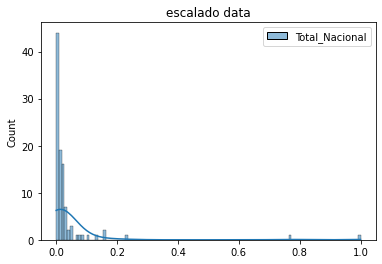

In [10]:
# plot escalado data
ax = sns.histplot(scaled_data, kde=True)
ax.set_title("escalado data")

plt.show()

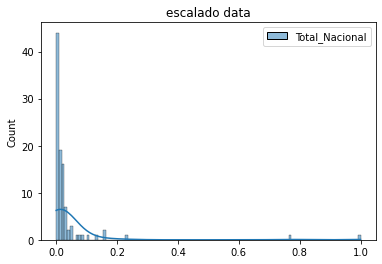

In [25]:
# plot escalado data
ax = sns.histplot(scaled_data, kde=True)
ax.set_title("escalado data")

plt.show()

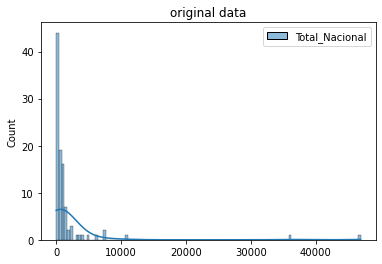

In [30]:
ax = sns.histplot(total_nal, kde=True)
ax.set_title("original data")

plt.show()

# Ahora verificar la Normalización
Ahora se normalizara el Total Nacional de persona con discapacidad por cada departamento de Colombia

In [7]:
# OTRA FORMA DE VER LA NORMALIZACION 1
# get the index of all positive pledges (Box-Cox only takes positive values)
total_nal_disc = discapacidadDeptos.Total_Nacional > 0

# get only positive pledges (using their indexes)
positive_totales = discapacidadDeptos.Total_Nacional.loc[total_nal_disc]

# normalize the pledges (w/ Box-Cox)
normalized_totales = pd.Series(stats.boxcox(positive_totales)[0], 
                               name='Total_Nacional', index=positive_totales.index)

print('Original data\nPreview:\n', positive_totales.head())
print('Minimum value:', float(positive_totales.min()),
      '\nMaximum value:', float(positive_totales.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_totales.head())
print('Minimum value:', float(normalized_totales.min()),
      '\nMaximum value:', float(normalized_totales.max()))

Original data
Preview:
 0    46857.3117
1    35868.9171
2    10988.3945
3       70.2000
4       35.7000
Name: Total_Nacional, dtype: float64
Minimum value: 12.0248344 
Maximum value: 46857.3117
______________________________

Normalized data
Preview:
 0    10.336555
1    10.089589
2     8.990385
3     4.184933
4     3.528104
Name: Total_Nacional, dtype: float64
Minimum value: 2.4641472630637824 
Maximum value: 10.336555150204703


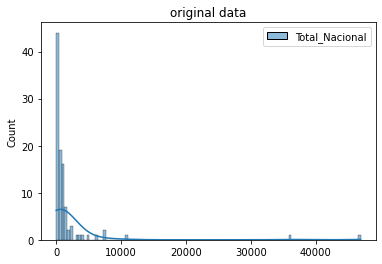

In [32]:
# plot normalized data
ax = sns.histplot(total_nal, kde=True)
ax.set_title("original data")

plt.show()

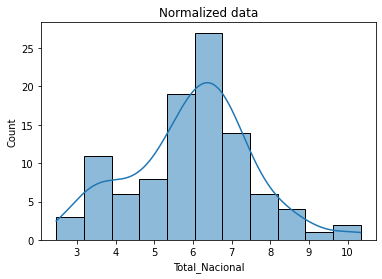

In [33]:
ax = sns.histplot(normalized_totales, kde=True)
ax.set_title("Normalized data")

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

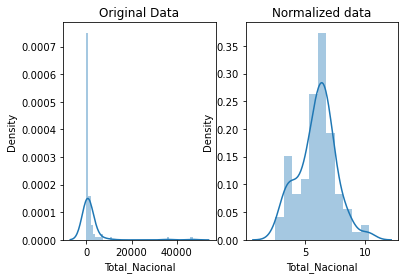

In [34]:
# OTRA FORMA DE VER LA NORMALIZACION 2
# get the index of all positive pledges (Box-Cox only takes positive values)
total_nal_disc = discapacidadDeptos.Total_Nacional > 0

# get only positive pledges (using their indexes)
positive_totales = discapacidadDeptos.Total_Nacional.loc[total_nal_disc]

# normalize the pledges (w/ Box-Cox)
normalized_totales = pd.Series(stats.boxcox(positive_totales)[0], 
                               name='Total_Nacional', index=positive_totales.index)

fig, ax=plt.subplots(1,2)
sns.distplot(positive_totales, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_totales, ax=ax[1])
ax[1].set_title("Normalized data")